# About Dataset
## Context
This dataset is of casting manufacturing product.
Casting is a manufacturing process in which a liquid material is usually poured into a mould, which contains a hollow cavity of the desired shape, and then allowed to solidify.
Reason for collect this data is casting defects!!
Casting defect is an undesired irregularity in a metal casting process.
There are many types of defect in casting like blow holes, pinholes, burr, shrinkage defects, mould material defects, pouring metal defects, metallurgical defects, etc.
Defects are an unwanted thing in casting industry. For removing this defective product all industry have their quality inspection department. But the main problem is this inspection process is carried out manually. It is a very time-consuming process and due to human accuracy, this is not 100% accurate. This can because of the rejection of the whole order. So it creates a big loss in the company.

We decided to make the inspection process automatic and for this, we need to make deep learning classification model for this problem.

## Contain
These all photos are top view of submersible pump impeller(google search for better understanding).
The dataset contains total 7348 image data. These all are the size of (300*300) pixels grey-scaled images. In all images, augmentation already applied.

Also uploaded images size of 512x512 grayscale. This data set is without Augmentation. This contains 519 ok_front and 781 def_front impeller images.

For capturing these images requires stable lighting, for this we made a special arrangement.

there are mainly two categories:-
1) Defective
2)Ok

making classification model we already split data for training and testing into two folders.
Both train and test folder contains def_front and ok_front subfolders.

train:- def_front have 3758 and ok_front have 2875 images
test:- def_front have:- def_front have 453 and ok_front have 262 images



In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

 91% 91.0M/100M [00:00<00:00, 133MB/s]
100% 100M/100M [00:00<00:00, 126MB/s] 


In [3]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten,Dense, Dropout, BatchNormalization

In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/real-life-industrial-dataset-of-casting-product.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_ds= keras.utils.image_dataset_from_directory(directory='/content/casting_data/casting_data/train',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(256,256))
validation_ds= keras.utils.image_dataset_from_directory(directory='/content/casting_data/casting_data/test',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(256,256))

Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.


In [6]:
# data normalization is mandatory
def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

In [7]:
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

# create CNN model-AlexNet Archetecture
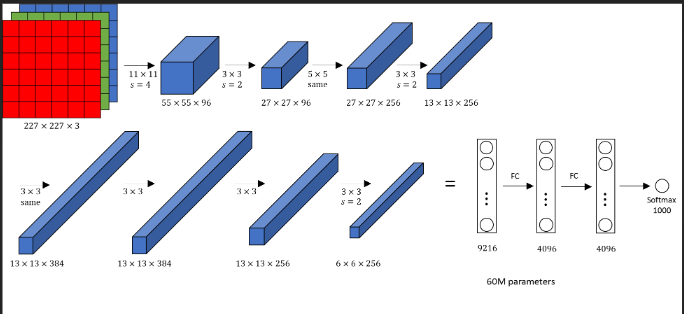

In [15]:
model=Sequential()
model.add(Conv2D(96, kernel_size=(11,11), padding='valid',
                 strides=4, activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(5,5),padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=3, padding='valid'))

model.add(Conv2D(384, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

# flatten

model.add(Flatten())

model.add(Dense(9216, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization_15 (Ba  (None, 62, 62, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_16 (Ba  (None, 30, 30, 256)       1024      
 tchNormalization)                                               
                                                      

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_ds, validation_data=validation_ds,
                  epochs=20)

Epoch 1/20
208/208 [==============================] - 19s 70ms/step - loss: 1.9917 - accuracy: 0.8387 - val_loss: 1.0175 - val_accuracy: 0.7944
Epoch 2/20
208/208 [==============================] - 14s 67ms/step - loss: 0.1990 - accuracy: 0.9209 - val_loss: 0.7985 - val_accuracy: 0.7510
Epoch 3/20
208/208 [==============================] - 15s 71ms/step - loss: 0.1810 - accuracy: 0.9314 - val_loss: 2.1867 - val_accuracy: 0.6587
Epoch 4/20
208/208 [==============================] - 15s 71ms/step - loss: 0.1235 - accuracy: 0.9549 - val_loss: 0.1198 - val_accuracy: 0.9441
Epoch 5/20
208/208 [==============================] - 16s 76ms/step - loss: 0.1022 - accuracy: 0.9640 - val_loss: 0.5224 - val_accuracy: 0.8476
Epoch 6/20
208/208 [==============================] - 15s 69ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0530 - val_accuracy: 0.9720
Epoch 7/20
208/208 [==============================] - 15s 70ms/step - loss: 0.0702 - accuracy: 0.9781 - val_loss: 1.0700 - val_accuracy:

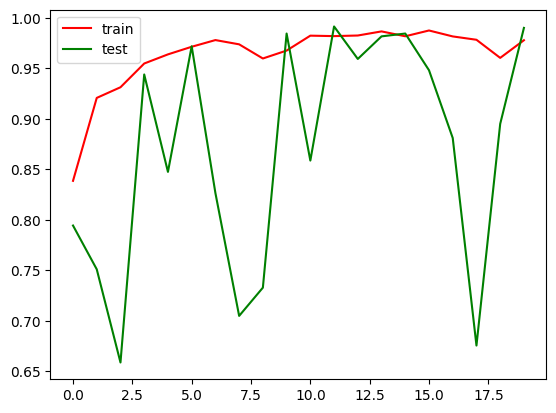

In [18]:
# loss: 0.0700 - accuracy: 0.9780 - val_loss: 0.0186 - val_accuracy: 0.9902
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.legend()
plt.show()